In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
# 1000개 데이터 포인트 랜덤 생성
np.random.seed(42)
x = np.linspace(0, 10, 1000)
y_actual = x + np.random.normal(0, 0.5, 1000)

In [4]:
def batch_gradient_descent(x, y_actual, w_init=0.2, lr=0.01, epochs=100):
    w = w_init
    mse_history = []
    w_history = [w_init]

    for epoch in range(epochs):
        # 예측값
        y_hat = w * x

        # 전체 데이터에 대한 평균 gradient구하기
        gradient = -2 * np.mean(x * (y_actual - y_hat))
        
        # 경사하강법, w업데이트
        w = w - lr * gradient
        
        # 그래프 plot하기 위해 list로 저장
        w_history.append(w)

        # MSE 계산
        mse = np.mean((y_actual - y_hat) ** 2)
        mse_history.append(mse)

    return w, mse_history, w_history

In [5]:
def stochastic_gradient_descent(x, y_actual, w_init=0.2, lr=0.01, epochs=100):
    w = w_init
    mse_history = []
    w_history = [w_init]
    n = len(x)

    for epoch in range(epochs):
        indices = np.arange(n)
        np.random.shuffle(indices)
        for i in indices:
            # 예측값
            y_hat = w * x[i]

            # 하나의 데이터에 대한 gradient구하기
            gradient = -2 * x[i] * (y_actual[i] - y_hat)
            
            # 경사하강법, w업데이트
            w = w - lr * gradient

            # 그래프 plot하기 위해 list로 저장
            w_history.append(w)

            # MSE 계산
            mse = (y_actual[i] - y_hat) ** 2
            mse_history.append(mse)

    return w, mse_history, w_history

In [6]:
def mini_batch_gradient_descent(x, y_actual, w_init=0.2, lr=0.01, epochs=100, batch_size=50):
    w = w_init
    mse_history = []
    w_history = [w_init]
    n = len(x)

    for epoch in range(epochs):
        # 데이터 순서를 랜덤하게 설정
        indices = np.arange(n)
        np.random.shuffle(indices)
        x_shuffled = x[indices]
        y_shuffled = y_actual[indices]
        
        # 배치 사이즈만큼 데이터 배정
        for i in range(0, n, batch_size):
            x_batch = x_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            # 예측값
            y_predicted = w * x_batch

            # 배치 데이터에 대한 평균 gradient구하기
            gradient = -2 * np.mean(x_batch * (y_batch - y_predicted))
            
            # 경사하강법, w업데이트
            w = w - lr * gradient
            w_history.append(w)

            # MSE 계산
            mse = np.mean((y_batch - y_predicted) ** 2)
            mse_history.append(mse)
            
    return w, mse_history, w_history

In [7]:
# 배치 경사하강법 Batch Gradient Descent
# w_gd, mse_history_gd, w_history_gd = batch_gradient_descent(x, y_actual)
# 확률적 경사하강법 Stochastic Gradient Descent
# w_gd, mse_history_gd, w_history_gd = stochastic_gradient_descent(x, y_actual)
# 미니-배치 경사하강법 Mini-batch Gradient Descent
w_gd, mse_history_gd, w_history_gd = mini_batch_gradient_descent(x, y_actual, batch_size=10)

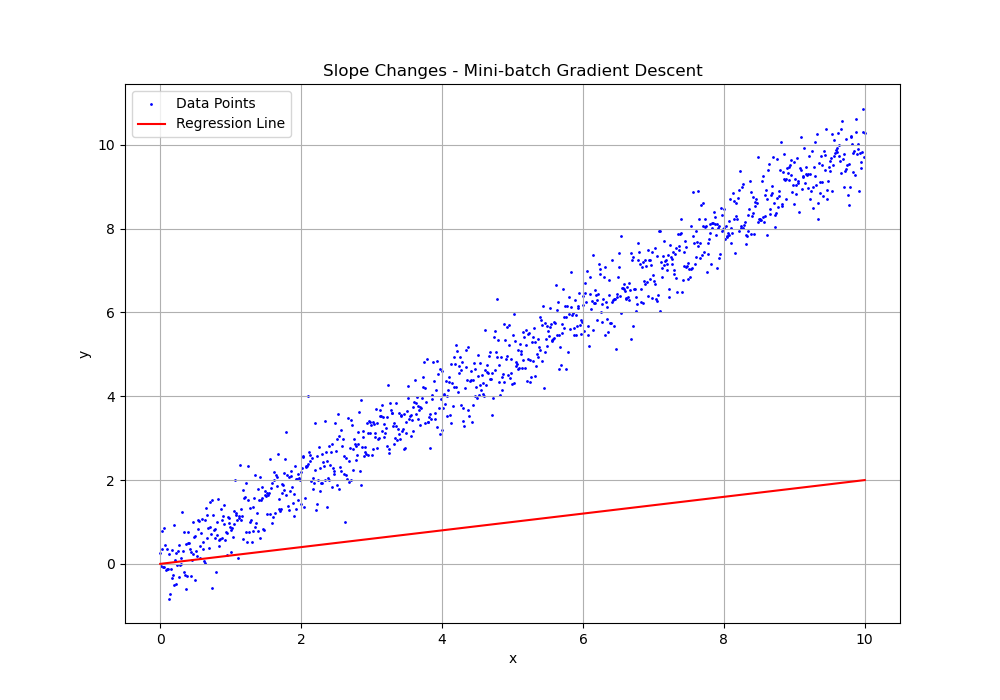

In [8]:
# 결과 그래프 plotting
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(x, y_actual, color='blue', s=1, label='Data Points')
line, = ax.plot(x, w_history_gd[0]*x, color='red', label='Regression Line')
ax.set_title('Slope Changes - Mini-batch Gradient Descent')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)

# 애니메이션을 위한 update function
def update(num):
    line.set_ydata(w_history_gd[num]*x)
    ax.set_title(f'Iteration {num}, w={w_history_gd[num]:.4f}')
    return line,

# 결과 그래프 애니메이션 
ani = FuncAnimation(fig, update, frames=len(w_history_gd), blit=True, repeat=False)
plt.show()